# Basic Visualization in Pandas

As you're doing exploratory analysis you'll often want to use some simple charts to visualize the data. Things we'll cover:
- Line charts
- Bar charts and Histograms
- Scatterplots
- Styling
- Labeling / legends
- Axes

We won't cover these here, but there are many other visualization libraries that can be used in Jupyter notbeooks including:
- [Bokeh](http://bokeh.pydata.org/en/latest/)
- [Seaborn](https://github.com/mwaskom/seaborn)
- [Plotly](https://plot.ly/python/)

In [23]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

# This magic function allows you to see the charts directly within the notebook. 
%matplotlib inline

# This command will make the plots more attractive by adopting the commone style of of a different library called ggplot
matplotlib.style.use("ggplot")

We can plot a list of numbers as a line chart very quickly with the `plt.plot` [function](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.plot). 

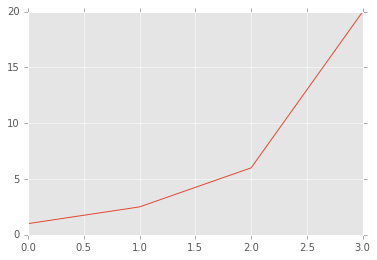

In [24]:
y = [1,2.5,6,20]
plt.plot(y)

And we can specify the x values in a separate list. 

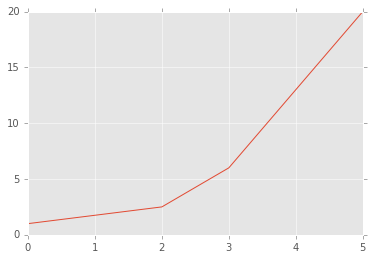

In [25]:
x = [0,2,3,5]
plt.plot(x,y)

There are many styling options in the [documentation](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.plot). Color is the one of the more useful styles. There are some common abbreviations you can use for colors like "b" but you can also directly specify a color using its RGB hex representation, e.g. #aa77aa

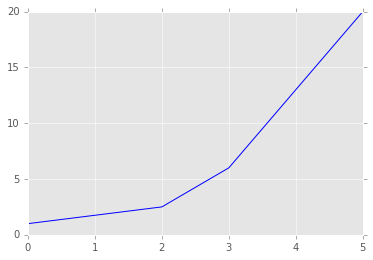

In [32]:
plt.plot(x,y, color="b")

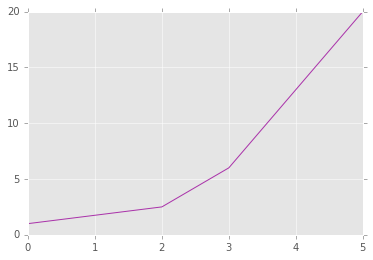

In [31]:
plt.plot(x,y, color="#aa33aa")

You can also change the line style, and add a marker for each point.

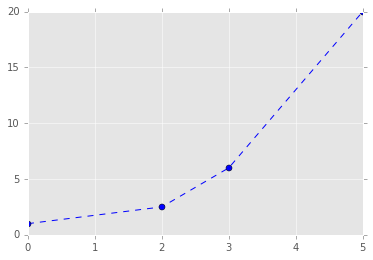

In [33]:
plt.plot(x,y, color="b", linestyle="--", marker="o")

And you can add multiple series to the same plot, including a legend to keep track of what's what. 

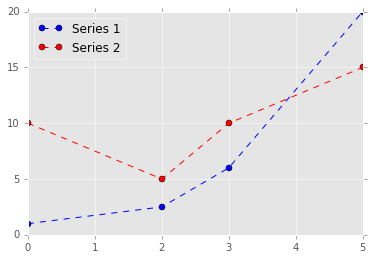

In [38]:
plt.plot(x,y, color="b", linestyle="--", marker="o", label="Series 1")
y2 = [10, 5, 10, 15]
plt.plot(x,y2, color="r", linestyle="--", marker="o", label = "Series 2")
plt.legend(loc='best')

We can also customize the axes. 

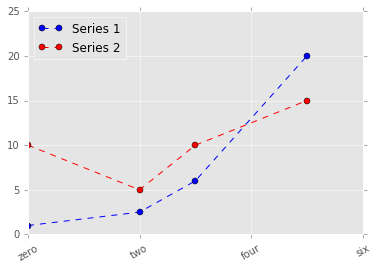

In [47]:
plt.plot(x,y, color="b", linestyle="--", marker="o", label="Series 1")
y2 = [10, 5, 10, 15]
plt.plot(x,y2, color="r", linestyle="--", marker="o", label = "Series 2")
plt.legend(loc='best')

axes = plt.gca()
axes.set_xticks([0,2,4,6])
axes.set_xticklabels(['zero', 'two', 'four', 'six'], rotation = 30)
axes.set_yticks([0,5,10,15,20,25])

Finally, we can set the size of a figure and save it to a file.

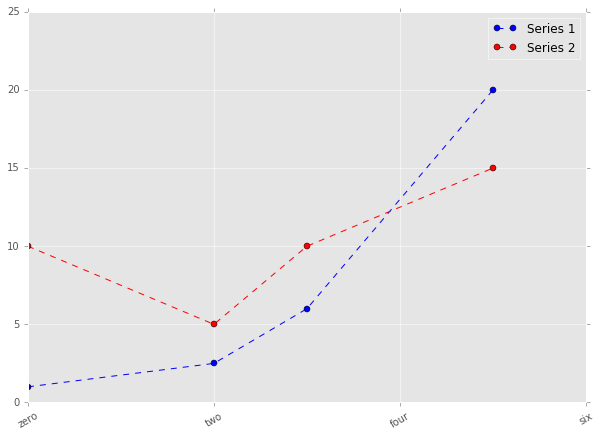

In [53]:
plt.plot(x,y, color="b", linestyle="--", marker="o", label="Series 1")
plt.plot(x,y2, color="r", linestyle="--", marker="o", label = "Series 2")
plt.legend(loc='best')

axes = plt.gca()
axes.set_xticks([0,2,4,6])
axes.set_xticklabels(['zero', 'two', 'four', 'six'], rotation = 30)
axes.set_yticks([0,5,10,15,20,25])

fig = plt.gcf()
fig.set_size_inches(10,7)
plt.savefig("chart.png")

### Charting Examples
Pandas has plotting capabilities directly accessible (though under the hood it's still Matplotlib). Lots more examples can be found [here](http://pandas.pydata.org/pandas-docs/stable/visualization.html). Let's examine how to do some basic analysis and charting of the robocall dataset.

In [174]:
robocall_df = pd.read_csv("Data/Telemarketing_RoboCall_Weekly_Data_Transformed.csv")
robocall_df

,issues,time_issued,caller_id,phone_number,type_robo,type_telemarketing,state,date_issued,date_created
0,Telemarketing (including do not call and spoof...,NaN,-,-,NaN,NaN,Pennsylvania,NaN,2015-10-01
1,Telemarketing (including do not call and spoof...,2014-07-01 08:20:00,610-990-4243,610-990-4243,NaN,Abandoned Calls,Pennsylvania,2014-07-01,2015-10-01
2,Telemarketing (including do not call and spoof...,2015-09-20 14:00:00,469-656-8497,-,NaN,Prerecorded Voice,Pennsylvania,2015-09-20,2015-10-01
3,Telemarketing (including do not call and spoof...,2015-09-23 11:46:00,717-657-3334,-,NaN,Abandoned Calls,Pennsylvania,2015-09-23,2015-10-01
4,Robocalls,2015-09-28 15:19:00,415-946-5707,-,Prerecorded Voice,NaN,Pennsylvania,2015-09-28,2015-10-01
5,Telemarketing (including do not call and spoof...,2015-09-29 12:00:00,215-624-8359,-,NaN,Live Voice,Pennsylvania,2015-09-29,2015-10-01
6,Telemarketing (including do not call and spoof...,2015-10-01 11:00:00,202-470-3314,-,NaN,Live Voice,Pennsylvania,2015-10-01,2015-10-01
7,Telemarketing (including do not call and spoof...,2015-10-01 10:21:00,567-263-0009,-,NaN,Live Voice,Pennsylvania,2015-10-01,2015-10-01
8,Telemarketing (including do not call and spoof...,2015-10-01 13:02:00,215-763-3788,-,NaN,Prerecorded Voice,Pennsylvania,2015-10-01,2015-10-01
9,Telemarketing (including do not call and spoof...,2015-10-01 12:58:00,717-245-2434,-,NaN,Prerecorded Voice,Pennsylvania,2015-10-01,2015-10-01


Telemarketing (including do not call and spoofing)    26485
Robocalls                                             12500
Name: issues, dtype: int64


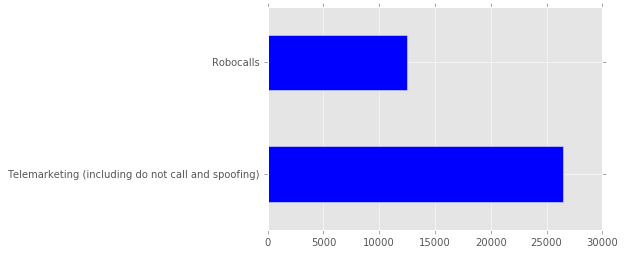

In [175]:
bar = robocall_df["issues"].value_counts()
print bar
bar.plot(kind="barh")

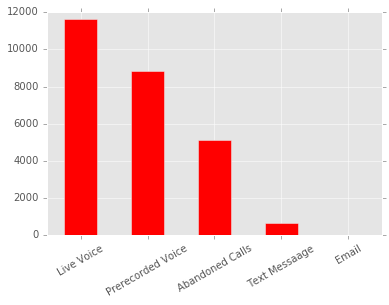

In [176]:
bar = robocall_df["type_telemarketing"].value_counts()
bar.plot(kind="bar", rot=30, color="r")

We'd like to know at what times of day these complaints are reported. A histogram would be helpful, so lets create one. 

In [177]:
# Create a new column that's just the hour of the day
robocall_df["hour_of_day"] = pd.DatetimeIndex(robocall_df["time_issued"]).hour
# Drop any rows in which the hour of the day is NaN
robocall_df = robocall_df.dropna(subset=["hour_of_day"])

Pandas has some charting functions built-in, like [`DataFrame.hist()`](http://pandas.pydata.org/pandas-docs/version/0.17.1/generated/pandas.DataFrame.hist.html) which can be used to quickly create a matrix of histograms. 

array([<matplotlib.axes._subplots.AxesSubplot object at 0x122b36f50>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x11492e350>], dtype=object)

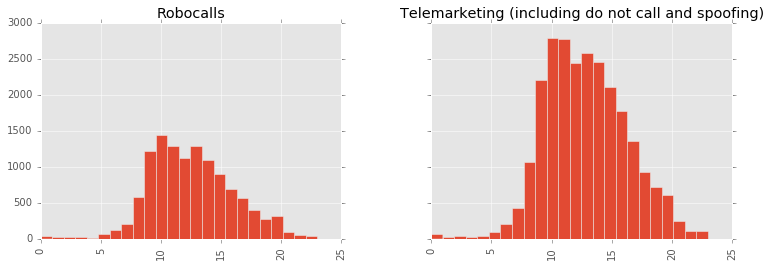

In [231]:
robocall_df.hist(column="hour_of_day", by="issues", bins=24, figsize=(12,4), sharey=True)

But if you want to stack histograms you have to approach things a bit differently. In the example below we first filter for two histograms we want to plot, and then pass them both explicitely to the plt.hist() function (which is slightly different from the hist() function that is available directly on a DataFrame). 

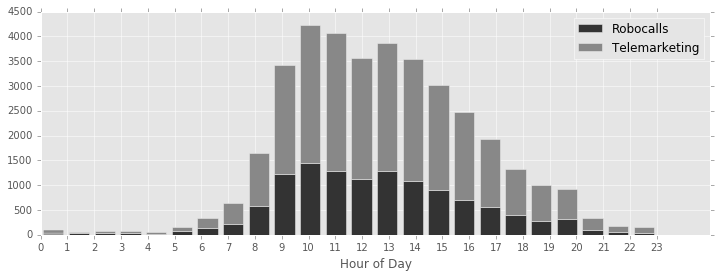

In [225]:
robocall_df_robo = robocall_df[robocall_df["issues"]=="Robocalls"]["hour_of_day"]
robocall_df_telemarketing = robocall_df[robocall_df["issues"]=="Telemarketing (including do not call and spoofing)"]["hour_of_day"]
plt.hist([robocall_df_robo, robocall_df_telemarketing], label=["Robocalls", "Telemarketing"], bins=24, stacked=True, color=["#333333", "#888888"])
plt.legend(loc='best')

axes = plt.gca()
axes.set_xlabel("Hour of Day")
axes.set_xticks(np.arange(24))
axes.set_xticklabels(np.arange(24), rotation = 0)

fig = plt.gcf()
fig.set_size_inches(12,4)

If we want to show a smooth version of the histogram we could use an area chart. 

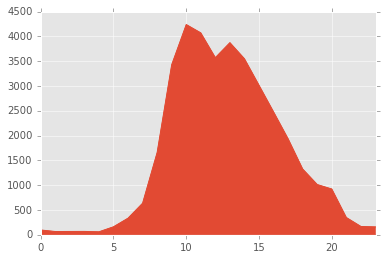

In [239]:
robocall_df["hour_of_day"].value_counts().sort_index().plot(kind="area")

The robocalls dataset isn't well suited for creating a scatterplot because it's mostly categorical data, with some time variables. Instead let's load in a dataset of [AirBnb listings](http://insideairbnb.com/get-the-data.html) from the Washington, DC area. Here's the [csv file](http://data.insideairbnb.com/united-states/dc/washington-dc/2015-10-03/visualisations/listings.csv).

In [249]:
airbnb_df = pd.read_csv("Data/airbnb_listings_dc.csv")
airbnb_df.sort_values("price", ascending=False )

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
2073,6041652,Art of Living Large!,10427471,Jeff & Chris,NaN,"Union Station, Stanton Park, Kingman Park",38.898457,-76.986093,Entire home/apt,2822,2,0,NaN,NaN,1,11
3305,8479494,Mansion in Georgetown,44658525,Doulat,NaN,"Cathedral Heights, McLean Gardens, Glover Park",38.925522,-77.073257,Entire home/apt,2000,1,0,NaN,NaN,2,360
3474,865732,Gorgeous Inauguration Rental,57867,Summer,NaN,"Capitol Hill, Lincoln Park",38.891488,-76.989592,Entire home/apt,2000,4,0,NaN,NaN,1,365
2604,8285534,Perfect Apartment for Papal Visit!,43686595,Cody,NaN,"Edgewood, Bloomingdale, Truxton Circle, Eckington",38.931608,-76.997909,Entire home/apt,2000,1,0,NaN,NaN,1,0
3204,8311492,Walking distance from Pope visit,43820430,James,NaN,"Columbia Heights, Mt. Pleasant, Pleasant Plain...",38.929380,-77.023305,Entire home/apt,2000,1,0,NaN,NaN,1,0
1866,8238125,Walking Distance to Brookland/CUA,15102481,Ryann,NaN,"Lamont Riggs, Queens Chapel, Fort Totten, Plea...",38.942081,-77.004891,Entire home/apt,1500,1,0,NaN,NaN,1,2
3222,8326850,Walk to Papal Mass,22714344,Jennifer,NaN,"Brookland, Brentwood, Langdon",38.924179,-76.990388,Entire home/apt,1400,2,0,NaN,NaN,1,0
704,3674676,$1300 (Bed Included) Room Available,18657916,Zachary,NaN,"Capitol View, Marshall Heights, Benning Heights",38.886241,-76.930404,Private room,1300,1,0,NaN,NaN,1,365
611,8587373,Walk to WhiteHouse VictorianMansion,5778691,Corbett,NaN,"Shaw, Logan Circle",38.907800,-77.034529,Entire home/apt,1250,1,0,NaN,NaN,6,365
1594,4519011,Large Victorian Mini Mansion,23428558,Sandra,NaN,"Brightwood Park, Crestwood, Petworth",38.950473,-77.033374,Entire home/apt,1250,3,0,NaN,NaN,1,283


A [scatterplot](http://pandas.pydata.org/pandas-docs/stable/visualization.html#scatter-plot) is a good way to check if there's a relationship between two variables. For example, we would expect there to be a connection between the number of reviews a listing has received and the number of reviews per month it receives. 

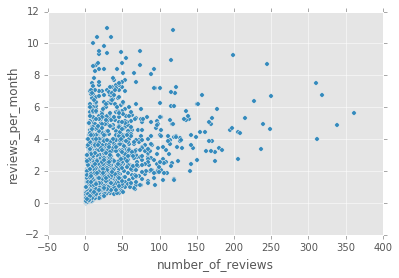

In [250]:
airbnb_df.plot(kind="scatter", x="number_of_reviews", y="reviews_per_month")

Of course there are many other types of charts that you can create with Pandas and/or Matplotlib, but you can accomplish a lot with line, bar, histogram, and scatterplots. For more ideas see the [Pandas documentation on visualization](http://pandas.pydata.org/pandas-docs/stable/visualization.html), or look into the libraries linked at the top of this notebook. 